<a href="https://colab.research.google.com/github/GoAshim/Convolutional-Neural-Network-with-TensorFlow/blob/main/01_Binary_Classification_in_CNN_with_Tensorflow_Predict_Dog_vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification in Convolutional Neural Network (CNN) using TensorFlow & Keras
In this project we will build CNN Deep Learning model and train it with lots of pictures of dogs and cats so that the model will be able to predict from a new image whether it's of a dog or a cat.

## Step 1 - Import necessary libraries

In [8]:
# For data import and extraction
import zipfile

# For data processing
import numpy as np
import matplotlib.pyplot as plt

# For Convolutional Neural Network (CNN)
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Rescaling


## Step 2 - Import Data
We will get the images for this exercise from this [link in Kaggle](https://www.kaggle.com/datasets/salader/dogs-vs-cats).

We can download the images from Kaggle to our computer and then upload those into the Google Colab working environment. However an easier option is to get them from Kaggle directly into the Google Colab working environment. To do that we have to first create an API token in Kaggle by following the steps below -
* Sign in to Kaggle.
* Click on the profile icon at the top left.
* Click on Settings.
* Go to the Account (first) tab.
* Scroll down to API section.
* Click on *Create New Token*.
* This will download a fiile named *kaggle.json*.
* Upload that file into Google Colab.
  * Click on Files (Folder icon) on the left menu bar of colab.
  * Click on Upload to session storage (first icon on top under Files).
  * Upload the kaggle.json file from where it was downloaded in computer.


In [2]:
# Create a .kaggle folder under root directory of colab
!mkdir -p /root/.kaggle

In [3]:
# Copy the kaggle.json file to the vewly created directory
!cp /content/kaggle.json /root/.kaggle/

In [4]:
# Copy the API command from the download option of the Kaggle dataset and execute that command
# This will download the images in form of a zip file
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:09<00:00, 148MB/s]
100% 1.06G/1.06G [00:09<00:00, 124MB/s]


In [5]:
# Extract the images from the zip file

zip = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip.extractall('/content')
zip.close()

## Step 3 - Load Data
In this step we will load the images of dogs and cats in the training and test folders into respective tensorflow datasets, which we will use in the subsequent CNN model.

In [6]:
# Load the training dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.


In [7]:
# Load the test dataset
test_ds = keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

Found 5000 files belonging to 2 classes.


## Step 4 - Visualize Data
In this step we visualize some of the random images to make sure the data is good before we use it in the subsequent CNN model.

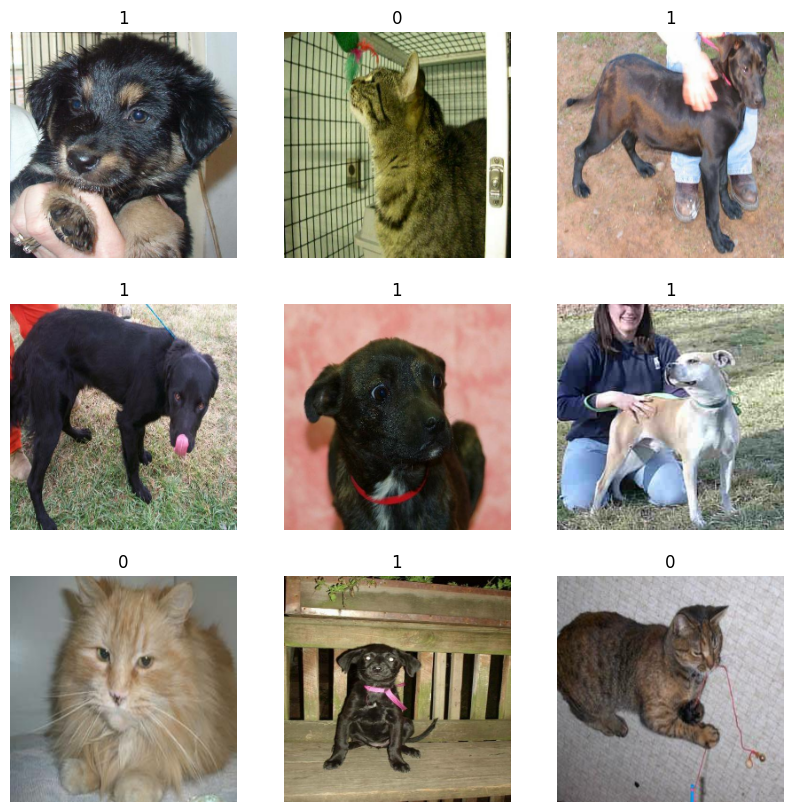

In [9]:
# Plot 10 random images from the training data
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.array(images[i]).astype('uint8'))
    plt.title(int(labels[i]))
    plt.axis('off')

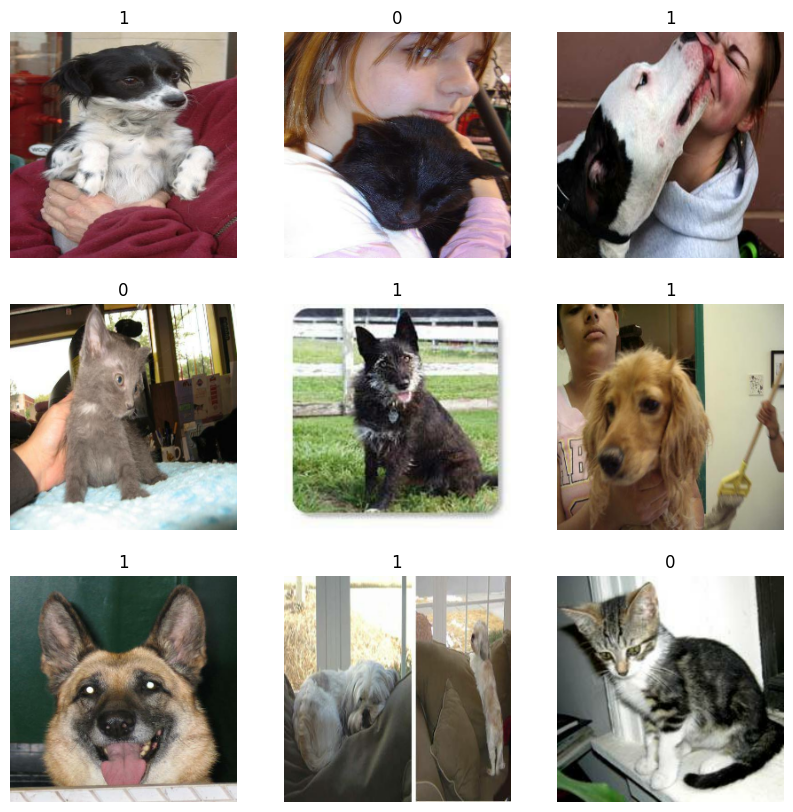

In [11]:
# Plot 10 random images from the test data

plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1):
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.array(images[i]).astype('uint8'))
    plt.title(int(labels[i]))
    plt.axis('off')

## Step 5 - Build the CNN Model
In this step we will build and compile CNN model.

In [14]:
model = Sequential()

model.add(Rescaling(1.0/255)) # This layer will normalize the image array so value of each pixel will be 0 to 1

model.add(Conv2D(32, kernel_size=(2, 2), padding="same", activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))

model.add(Conv2D(64, kernel_size=(2, 2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))

model.add(Conv2D(128, kernel_size=(2, 2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # Output layer with 1 nuron and sigmoid activation because of binary classification